#  &emsp; &emsp;&emsp; &emsp;&emsp; &emsp;&emsp; &emsp;&emsp; &emsp;&emsp; &emsp;&emsp; &emsp;LDA实验
### &emsp; &emsp;&emsp;&emsp; &emsp;&emsp; &emsp;&emsp; &emsp;&emsp; &emsp;&emsp; &emsp;&emsp; &emsp;&emsp; &emsp;中央财经大学 金融科技实验班
### 【内容摘要】
       本次实验主要按照LDA算法原理，对机器学习莺尾花数据进行处理，并将结果与机器学习sklearn库中LDA算法进行对比。值得强调的是，本实验未将LDA算法的应用局限在传统的降维问题上，而是通过应用其算法逻辑中的映射关系，将稠密交叉的数据进行特殊的映射变换，最终使得数据具有可分性。因此，本实验是对LDA应用领域的一个探索与拓展。

### 引入库

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### LDA算法实现

#### 1、获取数据：机器学习莺尾花

In [2]:
from sklearn import datasets
  
iris = datasets.load_iris()
  
X = iris.data
y = iris.target
target_names = iris.target_names


In [3]:
print('莺尾花的四个属性值：\n',X[40:55])
print('莺尾花的类别：\n',y[40:55])

莺尾花的四个属性值：
 [[5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.9 1.5]
 [5.5 2.3 4.  1.3]
 [6.5 2.8 4.6 1.5]]
莺尾花的类别：
 [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1]


#### 2、计算每一类别特征的均值向量

In [4]:
#用来存放不同类别特征的平均值向量
mean_vecs = []
#数据集一共有3个类别1,2,3
for label in range(0,3):
    mean_vecs.append(np.mean(X[label==y],axis=0))

#### 3、计算类间散布矩阵S(B)和类内散布矩阵S(W)
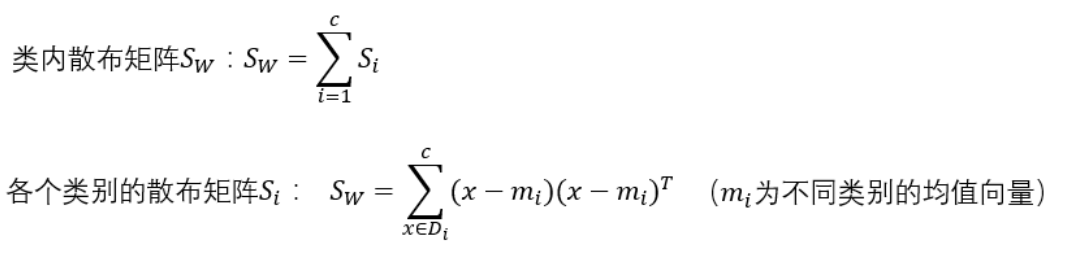

#### 4、计算类内散布矩阵S(W)

In [5]:
#定义每行数据的大小，每条数据有13个特征
d = len(X[0])
#定义类内散布矩阵
S_W = np.zeros((d,d))
# 计算类内的散布矩阵
for label, mv in zip(range(0, 3), mean_vecs):
    class_scatter = np.zeros((d, d))
    # 计算各个类别的散布矩阵
    for row in X[y == label]:
        row, mv = row.reshape(d, 1), mv.reshape(d, 1)
        class_scatter += (row - mv).dot((row - mv).T)
    S_W += class_scatter
    # print(np.bincount(train_y)[1:])


#### 5、归一化散布矩阵
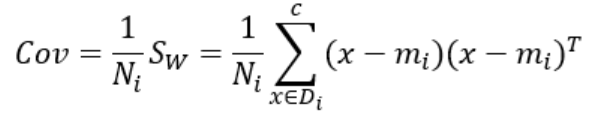

In [6]:
#计算类内的散布矩阵
for label,mv in zip(range(0,3),mean_vecs):
    class_scatter = np.cov(X[y == label].T)
    S_W += class_scatter

#### 6、计算类间散布矩阵S(B)
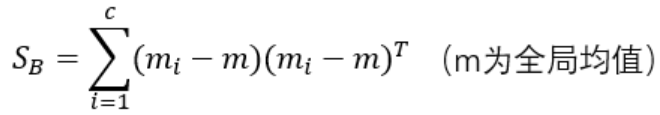

In [7]:
#计算全局均值m
mean_overall = np.mean(X,axis=0)
S_B = np.zeros((d,d))
for i,mean_vec in enumerate(mean_vecs):
    N = X[y == i+1,:].shape[0]
    mean_vec = mean_vec.reshape(d,1)
    mean_overall = mean_overall.reshape(d,1)
    S_B += N * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)


#### 7、计算矩阵S(W)^(-1)S(B)的特征值和对应的特征向量

In [8]:
#获取特征值和对应的特征向量
eigen_vals,eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
#获取特征对，并根据特征值的大小进行排序
eigen_pairs = [(np.abs(eigen_vals[i]),eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs,key=lambda k : k[0],reverse=True)
for eigen in eigen_pairs:
    print(eigen[0])

20.450348033752025
0.14381942072835457
5.603784894596175e-15
5.65824958338304e-16


#### 8、选取前k个特征和对应的特征向量，构造一个d×k维的转换矩阵W，其中特征向量以列的形式排列

In [9]:
W = np.hstack((eigen_pairs[0][1][:,np.newaxis].real,
               eigen_pairs[1][1][:,np.newaxis].real))
print(W)

[[-0.21050969  0.00438773]
 [-0.41568894 -0.56038541]
 [ 0.56943659  0.22111451]
 [ 0.67722253 -0.7981587 ]]


#### 9、将训练样本通过转换矩阵W映射到新的特征空间

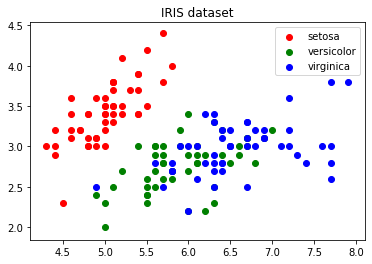

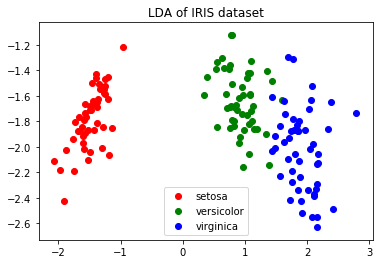

In [10]:
X_r2 = X.dot(W)

plt.figure()
for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    plt.scatter(X[y == i, 0], X[y == i, 1], c=c, label=target_name)
plt.legend()
plt.title('IRIS dataset')
plt.show()
plt.figure()
for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], c=c, label=target_name)
plt.legend()
plt.title('LDA of IRIS dataset')
plt.show()

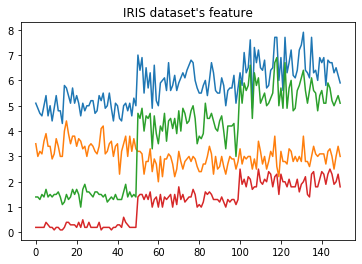

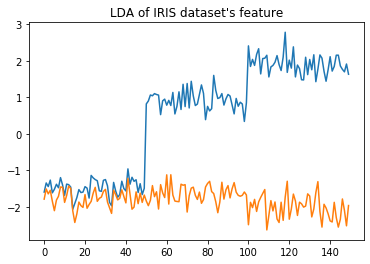

In [11]:
plt.figure()
plt.plot(X)
plt.title('IRIS dataset\'s feature')
plt.show()
plt.figure()
plt.plot(X_r2)
plt.title('LDA of IRIS dataset\'s feature')
plt.show()

#### 10、skit_learn包对比

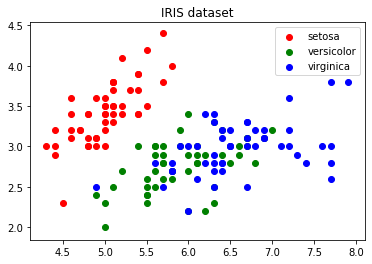

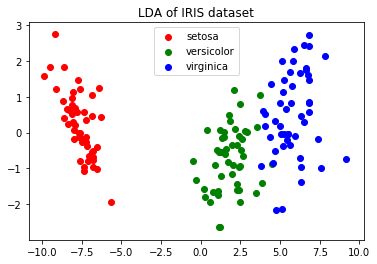

In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)
plt.figure()
for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    plt.scatter(X[y == i, 0], X[y == i, 1], c=c, label=target_name)
plt.legend()
plt.title('IRIS dataset')
plt.show()
plt.figure()
for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], c=c, label=target_name)
plt.legend()
plt.title('LDA of IRIS dataset')
plt.show()
